# Entrenamiento de red ResNet para clasificación de signo a texto.

---
---

# Índice.

- [Configuración](#configuración)
  - [Configuración de la red](#configuración-de-la-red)
  - [Dispositivo](#dispositivo-en-el-que-se-ejecuta-la-red)
- [Carga de datos](#carga-de-datos)
- [Entrenamiento](#entrenamiento)
  - [Creación del modelo](#creacion-del-modelo-a-entrenar)
  - [Entrenamiento](#entrenamiento)
  - [Gráfica de costes](#plot-de-los-costes-según-el-epoch)
- [Prueba](#prueba)
  - [Comprobando accuracy en batch](#comprobando-accuracy-en-un-batch)
  - [Comprobando una etiqueta específica](#comprobando-una-etiqueta-en-concreto)
- [Exportamos modelo](#exportamos-modelo)

## Configuración

---

### Hiperparámetros de la red

In [58]:
from config.const import LEARNING_RATE, BATCH_SIZE, NUM_EPOCHS, TRAIN_SPLIT, IMAGE_SIZE

In [59]:
print(
    f"LEARNING_RATE: {LEARNING_RATE}. BATCH_SIZE: {BATCH_SIZE}. NUM_EPOCHS: {NUM_EPOCHS}. TRAIN_SPLIT: {TRAIN_SPLIT}. IMAGE_SIZE: {IMAGE_SIZE}"
)

LEARNING_RATE: 0.001. BATCH_SIZE: 128. NUM_EPOCHS: 25. TRAIN_SPLIT: 0.7. IMAGE_SIZE: (224, 224)


### Configuración de torch. 

In [60]:
from config.torch import get_device, get_transform

In [61]:
device = get_device()
print(f"Device: {device}")

Device: cuda


In [62]:
transform = get_transform(IMAGE_SIZE)
transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

### Elección del dataset

In [63]:
from config.dataset import get_dataset_info, get_datasets

In [64]:
datasets = get_datasets()
print("Available local datasets: ")
datasets

Available local datasets: 


{'WLASL': {'name': 'WLASL_frames_100', 'path': 'WLASL/frames_100'},
 'animals': {'name': 'animals_simple', 'path': 'animals/all'}}

In [65]:
DATASET = "WLASL"
data_path, model_path = get_dataset_info(DATASET)
print(f"Dataset: {DATASET}. Data path: {data_path}. Model path: {model_path}")

Dataset: WLASL. Data path: d:\Proyectos\TFG\Sign2Text\Project\data\WLASL\frames_100. Model path: d:\Proyectos\TFG\Sign2Text\Project\models\resnet_WLASL_frames_100.pth


## Carga de datos

---

In [66]:
from utils.loader import split_dataset, get_dataset

### Se carga el dataset

In [67]:
dataset, classes = get_dataset(data_path, transform)

print(f"Some classes in dataset: {classes[:5]}")

Some classes in dataset: ['accident', 'africa', 'all', 'apple', 'basketball']


### Ejemplo de entrada y salida del dataset

In [68]:
from utils.output import show_image
from numpy.random import randint

Target of image is: 'enjoy'


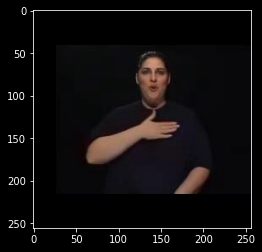

In [69]:
rand_index = randint(0, len(dataset))
img, target = dataset.imgs[rand_index]

print(f"Target of image is: '{classes[target]}'")
show_image(img)

### Divide el dataset en entrenamiento y test

In [70]:
train_loader, test_loader = split_dataset(dataset, TRAIN_SPLIT, BATCH_SIZE)

print(
    f"Number of batches for tranning: {len(train_loader)}. Number of batches for testing: {len(test_loader)}. ({BATCH_SIZE} images/batch)"
)

Number of batches for tranning: 12. Number of batches for testing: 5. (128 images/batch)


## Entrenamiento

---

### Creación del model a entrenar


In [71]:
from lib.model import create_model

In [72]:
num_classes = len(classes)
model = create_model(num_classes)

### Entrenamiento

In [73]:
from lib.train import train_model

In [74]:
costs = train_model(
    model,
    train_loader=train_loader,
    device=device,
    learning_rate=LEARNING_RATE,
    num_epochs=NUM_EPOCHS,
)

Training on device: cuda
Cost at epoch 1 is 4.72679
Cost at epoch 2 is 4.55371
Cost at epoch 3 is 4.50495
Cost at epoch 4 is 4.43452
Cost at epoch 5 is 4.34361
Cost at epoch 6 is 4.25055
Cost at epoch 7 is 4.15526
Cost at epoch 8 is 4.06215
Cost at epoch 9 is 3.95779
Cost at epoch 10 is 3.85021
Cost at epoch 11 is 3.75935
Cost at epoch 12 is 3.67684
Cost at epoch 13 is 3.57445
Cost at epoch 14 is 3.50241
Cost at epoch 15 is 3.39633
Cost at epoch 16 is 3.31572
Cost at epoch 17 is 3.24458
Cost at epoch 18 is 3.17241
Cost at epoch 19 is 3.06403
Cost at epoch 20 is 2.99405
Cost at epoch 21 is 3.00136
Cost at epoch 22 is 2.91435
Cost at epoch 23 is 2.76573
Cost at epoch 24 is 2.76277
Cost at epoch 25 is 2.67162


### Plot de los costes según el epoch

In [75]:
from utils.output import plot_costs

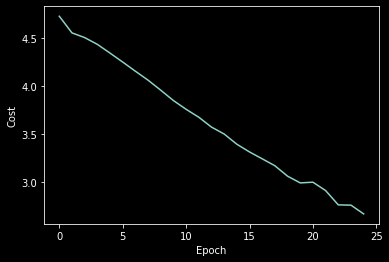

In [76]:
plot_costs(costs)

## Prueba

---

In [77]:
from lib.test import check_accuracy, predict_class

### Comprobando accuracy en un batch

Checking accuracy on TRAIN set batch
Images for 1


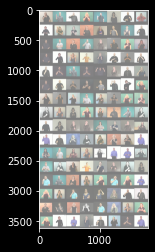

Predictions for batch 1 
['drink', 'later', 'full', 'family', 'man', 'pink', 'walk', 'dark', 'walk', 'table', 'family', 'bowling', 'woman', 'tall', 'paint', 'bowling', 'bowling', 'son', 'brown', 'apple', 'man', 'like', 'paper', 'dog', 'bowling', 'drink', 'medicine', 'can', 'study', 'cook', 'same', 'city', 'wrong', 'study', 'later', 'but', 'decide', 'how', 'who', 'apple', 'what', 'decide', 'all', 'medicine', 'bowling', 'forget', 'go', 'hat', 'drink', 'cow', 'full', 'dog', 'medicine', 'but', 'pull', 'paper', 'tell', 'enjoy', 'book', 'dog', 'family', 'africa', 'candy', 'paper', 'africa', 'time', 'doctor', 'eat', 'walk', 'go', 'shirt', 'before', 'before', 'fish', 'cheat', 'year', 'chair', 'letter', 'letter', 'tell', 'doctor', 'deaf', 'language', 'man', 'cow', 'bowling', 'year', 'basketball', 'cheat', 'work', 'what', 'medicine', 'who', 'walk', 'work', 'white', 'cool', 'language', 'medicine', 'book', 'wrong', 'bed', 'deaf', 'secretary', 'family', 'book', 'wrong', 'bowling', 'cow', 'medicine'

In [78]:
print("Checking accuracy on TRAIN set batch")
check_accuracy(train_loader, model, classes, device)

Checking accuracy on TEST set batch
Images for 1


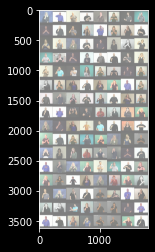

Predictions for batch 1 
['tall', 'computer', 'no', 'bed', 'how', 'clothes', 'before', 'apple', 'year', 'mother', 'tall', 'decide', 'table', 'book', 'pink', 'pull', 'paper', 'forget', 'birthday', 'thanksgiving', 'what', 'letter', 'paper', 'pink', 'decide', 'medicine', 'but', 'year', 'like', 'pizza', 'tall', 'kiss', 'medicine', 'who', 'paint', 'thin', 'chair', 'now', 'what', 'chair', 'tell', 'book', 'like', 'shirt', 'paper', 'like', 'bird', 'table', 'bowling', 'apple', 'shirt', 'year', 'all', 'give', 'paper', 'clothes', 'color', 'play', 'paint', 'thursday', 'year', 'africa', 'no', 'full', 'how', 'drink', 'purple', 'can', 'tell', 'mother', 'bowling', 'table', 'paper', 'decide', 'chair', 'drink', 'study', 'dog', 'who', 'medicine', 'paint', 'book', 'wrong', 'dark', 'family', 'dog', 'what', 'pizza', 'enjoy', 'go', 'how', 'eat', 'medicine', 'hat', 'thanksgiving', 'paper', 'deaf', 'computer', 'study', 'like', 'how', 'enjoy', 'forget', 'fine', 'who', 'medicine', 'hearing', 'but', 'tall', 'walk

In [79]:
print("Checking accuracy on TEST set batch")
check_accuracy(test_loader, model, classes, device)

### Comprobando una etiqueta en concreto

In [80]:
label = "apple"

Prediction for apple and TRAIN set


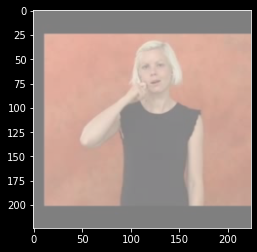

Prediction: apple. Ground truth: apple


In [81]:
print(f"Prediction for {label} and TRAIN set")
predict_class(train_loader, model, classes, label, device)

Prediction for apple and TEST set


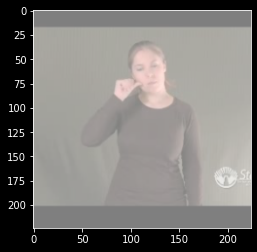

Prediction: eat. Ground truth: apple


In [82]:
print(f"Prediction for {label} and TEST set")
predict_class(test_loader, model, classes, label, device)

## Exportamos modelo

---

In [83]:
from lib.model import export_model

In [84]:
export_model(model, model_path)
print(f"Model exported to {model_path}")

Model exported to d:\Proyectos\TFG\Sign2Text\Project\models\resnet_WLASL_frames_100.pth
